In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow_datasets as tfds


In [2]:
# Load the EMNIST dataset (ByClass version)
dataset, info = tfds.load('emnist/byclass', with_info=True, as_supervised=True)

# Split the dataset into training and test sets
train_data, test_data = dataset['train'], dataset['test']


In [3]:
# Normalize and preprocess data (resize, normalize)
def preprocess_data(data):
    images, labels = [], []
    for image, label in data:
        image = tf.image.resize(image, (28, 28))  # Resize to 28x28 (standard MNIST size)
        
        # Check if the image is in grayscale (1 channel) and add the channel dimension if needed
        if len(image.shape) == 2:  # Grayscale image
            image = tf.expand_dims(image, axis=-1)  # Add channel dimension (28, 28) -> (28, 28, 1)
        
        image = tf.cast(image, tf.float32) / 255.0  # Normalize to [0, 1]
        images.append(image)
        labels.append(label)
    return np.array(images), np.array(labels)


In [7]:
# Preprocess training and testing data
train_images, train_labels = preprocess_data(train_data)
test_images, test_labels = preprocess_data(test_data)

# One-hot encode labels (EMNIST has 814 labels, corresponding to different characters)
train_labels = to_categorical(train_labels, 814)
test_labels = to_categorical(test_labels, 814)


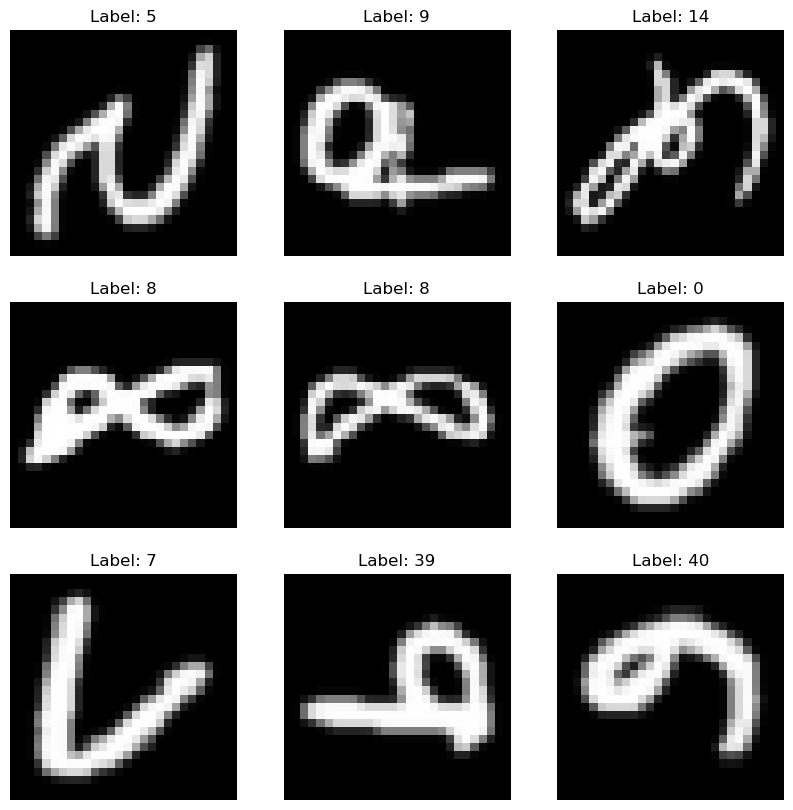

In [8]:
# Visualize a few images from the dataset to ensure correct preprocessing
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i].argmax()}")
    plt.axis('off')
plt.show()


In [9]:
# Build the CNN model
model = models.Sequential([
    layers.InputLayer(input_shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(814, activation='softmax')  # 814 classes for EMNIST
])


C:\Users\sreep\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [10]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [11]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))


Epoch 1/10
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 461s 21ms/step - accuracy: 0.7331 - loss: 0.9030 - val_accuracy: 0.8565 - val_loss: 0.3963
Epoch 2/10
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 472s 22ms/step - accuracy: 0.8406 - loss: 0.4632 - val_accuracy: 0.8623 - val_loss: 0.3771
Epoch 3/10
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 466s 21ms/step - accuracy: 0.8487 - loss: 0.4328 - val_accuracy: 0.8625 - val_loss: 0.3788
Epoch 4/10
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 468s 21ms/step - accuracy: 0.8528 - loss: 0.4182 - val_accuracy: 0.8665 - val_loss: 0.3755
Epoch 5/10
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 481s 22ms/step - accuracy: 0.8548 - loss: 0.4100 - val_accuracy: 0.8647 - val_loss: 0.3748
Epoch 6/10
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 536s 25ms/step - accuracy: 0.8565 - loss: 0.4063 - val_accuracy: 0.8650 - val_loss: 0.3713
Epoch 7/10
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 546s 25ms/step - accuracy: 0.8558 - loss: 0.4072 - val_accuracy: 0.8640 - val_loss: 0.3827
Epoch 8/10
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 514s 24ms/s

In [12]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")


3636/3636 - 29s - 8ms/step - accuracy: 0.8652 - loss: 0.3834
Test accuracy: 0.8651943206787109


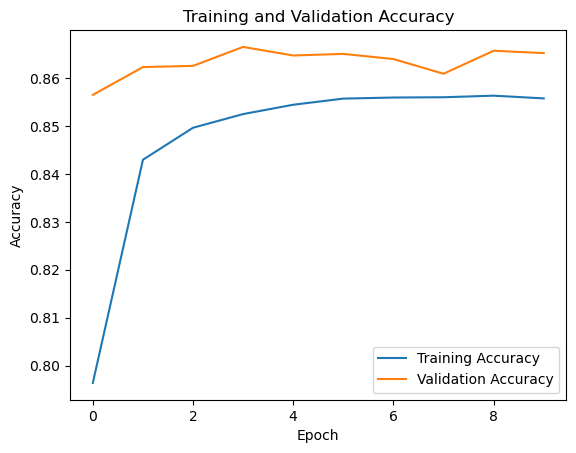

In [13]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


In [22]:
import pickle

# Save the trained model to a .pkl file
with open('handwritten_character_model.pkl', 'wb') as file:
    pickle.dump(model, file)
